In [1]:
from pathlib import Path
import datetime as dt
import pandas as pd

### Florida EV Registrations DataFrame (Clean)

In [2]:
#  Load the EV registrations data for Florida
fl_ev_df = pd.read_csv(
    Path("../../../../data/processed_data/fl_ev_registrations.csv"),
    parse_dates=["registration_date"],
)

#  Sort the data by registration date
fl_ev_df.sort_values("registration_date", inplace=True)

print("Shape:", fl_ev_df.shape)
fl_ev_df

Shape: (353974, 6)


,registration_date,state,county,zip_codes,make,model
0,2018-06-30,FL,Miami-Dade County,"[33002, 33010, 33011, 33012, 33013, 33014, 330...",Tesla,Model X
19628,2018-06-30,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",BMW,X5
19627,2018-06-30,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",Tesla,Model X
19626,2018-06-30,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",Tesla,Model X
19625,2018-06-30,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",Tesla,Model X
...,...,...,...,...,...,...
291822,2021-07-19,FL,Orange County,"[32703, 32704, 32709, 32710, 32712, 32733, 327...",Volvo,XC90 Plug In
291821,2021-07-19,FL,Martin County,"[33455, 33475, 34956, 34957, 34958, 34990, 349...",Volvo,XC90 Plug In
291820,2021-07-19,FL,Collier County,"[34101, 34102, 34103, 34104, 34105, 34106, 341...",Volvo,XC90 Plug In
291818,2021-07-19,FL,Osceola County,"[33848, 34739, 34741, 34742, 34743, 34744, 347...",Volvo,XC90 Plug In


In [3]:
# Inspect the data types of the EV registrations DataFrame
fl_ev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353974 entries, 0 to 353973
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   registration_date  353974 non-null  datetime64[ns]
 1   state              353974 non-null  object        
 2   county             353974 non-null  object        
 3   zip_codes          343363 non-null  object        
 4   make               353974 non-null  object        
 5   model              353974 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 18.9+ MB


In [4]:
# Check for missing values 
# `zip_codes` has missing values
# `county` has missing values marked as "Unknown" so it is not seen as missing
fl_ev_df.isnull().sum()

registration_date        0
state                    0
county                   0
zip_codes            10611
make                     0
model                    0
dtype: int64

In [5]:
# Change the value of `Desoto County` to `DeSoto County` 
# to match the population DataFrame county names later on...
select_column = "county"
select_row = "Desoto County"
change_value = "DeSoto County"

# filter the DataFrame
filter_county = fl_ev_df[select_column] == select_row

# change the value
fl_ev_df.loc[filter_county, select_column] = change_value

# confirm the change was made
fl_ev_df[fl_ev_df[select_column] == change_value].head()

,registration_date,state,county,zip_codes,make,model
919,2018-06-30,FL,DeSoto County,"[34265, 34267]",Porsche,Cayenne S E-Hybrid
1537,2018-06-30,FL,DeSoto County,"[34265, 34267]",Mitsubishi,Outlander Plug In
1536,2018-06-30,FL,DeSoto County,"[34265, 34267]",Chrysler,Pacifica
1535,2018-06-30,FL,DeSoto County,"[34265, 34267]",Volvo,S90 Plug In
1534,2018-06-30,FL,DeSoto County,"[34265, 34267]",Ford,Fusion Energi


In [6]:
# Change the value of `Unknown` to `NA` 
# so that it can show up as missing in the DataFrame...
select_column = "county"
select_row = "Unknown"
change_value = pd.NA

# filter the DataFrame
filter_county = fl_ev_df[select_column] == select_row

# change the value
fl_ev_df.loc[filter_county, select_column] = change_value

# confirm the change was made
fl_ev_df.loc[fl_ev_df["county"].isna(), :]

,registration_date,state,county,zip_codes,make,model
28743,2018-06-30,FL,<NA>,NaN,Chevrolet,Volt
28585,2018-06-30,FL,<NA>,NaN,Volvo,XC90 Plug In
28584,2018-06-30,FL,<NA>,NaN,Volvo,XC90 Plug In
28583,2018-06-30,FL,<NA>,NaN,Volvo,XC90 Plug In
28582,2018-06-30,FL,<NA>,NaN,Volvo,XC90 Plug In
...,...,...,...,...,...,...
291896,2021-07-19,FL,<NA>,NaN,Volvo,XC60 Plug In
291929,2021-07-19,FL,<NA>,NaN,Volvo,XC60 Plug In
291922,2021-07-19,FL,<NA>,NaN,Volvo,XC90 Plug In
291917,2021-07-19,FL,<NA>,NaN,Volvo,XC90 Plug In


In [7]:
# Missing values are now correctly marked as `NA` for `county`
fl_ev_df.isnull().sum()

registration_date        0
state                    0
county               10611
zip_codes            10611
make                     0
model                    0
dtype: int64

### Florida Population DataFrame (Clean)

In [8]:
# Load the population data for Florida
fl_pop_df = pd.read_csv(
    Path("../../../../data/processed_data/fl_population.csv"),
    parse_dates=["date"],
)

# Sort the data by date
fl_pop_df.sort_values("date", inplace=True)

# Rename the `date` column to `year`
fl_pop_df.rename(columns={"date": "year"}, inplace=True)

print("Shape:", fl_pop_df.shape)
fl_pop_df

Shape: (1005, 5)


,year,state,county,zip_codes,population
0,2010-01-01,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",247614
36,2010-01-01,FL,Levy County,"[32621, 32625, 32626, 32639, 32644, 32668, 326...",40720
37,2010-01-01,FL,Liberty County,"[32321, 32334, 32335, 32360]",8349
38,2010-01-01,FL,Madison County,"[32059, 32331, 32340, 32341, 32350]",19248
39,2010-01-01,FL,Manatee County,"[34201, 34202, 34203, 34204, 34205, 34206, 342...",323424
...,...,...,...,...,...
957,2024-01-01,FL,Gilchrist County,"[32693, 32619]",16430
956,2024-01-01,FL,Gadsden County,"[32351, 32333, 32352, 32324, 32343, 32332, 32330]",43746
955,2024-01-01,FL,Franklin County,"[32322, 32328, 32320, 32323]",11780
961,2024-01-01,FL,Hardee County,"[33873, 33834, 33890, 33865]",25736


In [9]:
# Inspect the data types of the population DataFrame
fl_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1004
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        1005 non-null   datetime64[ns]
 1   state       1005 non-null   object        
 2   county      1005 non-null   object        
 3   zip_codes   1005 non-null   object        
 4   population  1005 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.1+ KB


In [10]:
# Inspect the missing values in the population DataFrame
fl_pop_df.isnull().sum()

year          0
state         0
county        0
zip_codes     0
population    0
dtype: int64

### Prepare EV Registration DataFrame for Merge

In [11]:
# Create a new column for the `year` so we can merge later with the population DataFrame
fl_ev_df["year"] = fl_ev_df["registration_date"].dt.year

print("Shape:", fl_ev_df.shape)
fl_ev_df

Shape: (353974, 7)


,registration_date,state,county,zip_codes,make,model,year
0,2018-06-30,FL,Miami-Dade County,"[33002, 33010, 33011, 33012, 33013, 33014, 330...",Tesla,Model X,2018
19628,2018-06-30,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",BMW,X5,2018
19627,2018-06-30,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",Tesla,Model X,2018
19626,2018-06-30,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",Tesla,Model X,2018
19625,2018-06-30,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",Tesla,Model X,2018
...,...,...,...,...,...,...,...
291822,2021-07-19,FL,Orange County,"[32703, 32704, 32709, 32710, 32712, 32733, 327...",Volvo,XC90 Plug In,2021
291821,2021-07-19,FL,Martin County,"[33455, 33475, 34956, 34957, 34958, 34990, 349...",Volvo,XC90 Plug In,2021
291820,2021-07-19,FL,Collier County,"[34101, 34102, 34103, 34104, 34105, 34106, 341...",Volvo,XC90 Plug In,2021
291818,2021-07-19,FL,Osceola County,"[33848, 34739, 34741, 34742, 34743, 34744, 347...",Volvo,XC90 Plug In,2021


In [12]:
# Group the EV registrations DataFrame by `year`, `state`, `county`, and `registration_date`...
# to get the total number of registrations per specific dates grouped by year, state, and county
# Create column for the total number of registrations called `registrations`
fl_ev_df_group = fl_ev_df.groupby(['year', 'state', 'county', "registration_date"], dropna=False).size().reset_index(name='ev_registrations')

print("Shape:", fl_ev_df_group.shape)
fl_ev_df_group

Shape: (399, 5)


,year,state,county,registration_date,ev_registrations
0,2018,FL,Alachua County,2018-06-30,335
1,2018,FL,Alachua County,2018-12-31,431
2,2018,FL,Baker County,2018-06-30,3
3,2018,FL,Baker County,2018-12-31,2
4,2018,FL,Bay County,2018-06-30,141
...,...,...,...,...,...
394,2021,FL,Volusia County,2021-07-19,1458
395,2021,FL,Wakulla County,2021-07-19,38
396,2021,FL,Walton County,2021-07-19,314
397,2021,FL,Washington County,2021-07-19,14


In [13]:
# Check for missing values in the grouped DataFrame
fl_ev_df_group.isnull().sum()

year                 0
state                0
county               6
registration_date    0
ev_registrations     0
dtype: int64

In [14]:
# Inspect to see if Unknown values are kept after grouping
# Important to keep as they have valuable information on registration counts
fl_ev_df_group.loc[fl_ev_df_group["county"].isna(), :]

,year,state,county,registration_date,ev_registrations
129,2018,FL,NaN,2018-06-30,709
130,2018,FL,NaN,2018-12-31,1092
197,2019,FL,NaN,2019-12-31,1778
330,2020,FL,NaN,2020-06-30,1769
331,2020,FL,NaN,2020-12-31,2226
398,2021,FL,NaN,2021-07-19,3037


### Prepare Population DataFrame for Merge

In [15]:
# Change the value of the year from DateTime to int ready for merging
fl_pop_df['year'] = fl_pop_df['year'].dt.year

print("Shape:", fl_pop_df.shape)
fl_pop_df

Shape: (1005, 5)


,year,state,county,zip_codes,population
0,2010,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",247614
36,2010,FL,Levy County,"[32621, 32625, 32626, 32639, 32644, 32668, 326...",40720
37,2010,FL,Liberty County,"[32321, 32334, 32335, 32360]",8349
38,2010,FL,Madison County,"[32059, 32331, 32340, 32341, 32350]",19248
39,2010,FL,Manatee County,"[34201, 34202, 34203, 34204, 34205, 34206, 342...",323424
...,...,...,...,...,...
957,2024,FL,Gilchrist County,"[32693, 32619]",16430
956,2024,FL,Gadsden County,"[32351, 32333, 32352, 32324, 32343, 32332, 32330]",43746
955,2024,FL,Franklin County,"[32322, 32328, 32320, 32323]",11780
961,2024,FL,Hardee County,"[33873, 33834, 33890, 33865]",25736


In [16]:
# Create a list of unique years in the EV registrations DataFrame
# This will be used to filter the population DataFrame
# and keep only the years that are present in the EV registrations DataFrame

select_years = fl_ev_df_group['year'].unique()
select_years

array([2018, 2019, 2020, 2021])

In [17]:
# Filter the population DataFrame to keep only the years present in the EV registrations DataFrame
filter_years = fl_pop_df['year'].isin(select_years)

# Create a new DataFrame with the filtered population data
fl_pop_filtered = fl_pop_df.loc[filter_years, :]

# Reset the index of the filtered population DataFrame
fl_pop_filtered.reset_index(drop=True, inplace=True)

fl_pop_filtered

,year,state,county,zip_codes,population
0,2018,FL,Nassau County,"[32009, 32011, 32034, 32035, 32041, 32046, 32097]",85936
1,2018,FL,Osceola County,"[33848, 34739, 34741, 34742, 34743, 34744, 347...",368456
2,2018,FL,Orange County,"[32703, 32704, 32709, 32710, 32712, 32733, 327...",1381540
3,2018,FL,Okeechobee County,"[34972, 34973, 34974]",41654
4,2018,FL,Okaloosa County,"[32531, 32536, 32537, 32539, 32540, 32541, 325...",206934
...,...,...,...,...,...
263,2021,FL,Gulf County,"[32456, 32457, 32465]",14462
264,2021,FL,Glades County,"[33471, 33944]",12266
265,2021,FL,Gilchrist County,"[32619, 32693]",18316
266,2021,FL,Gadsden County,"[32324, 32330, 32332, 32333, 32343, 32351, 323...",43599


### Merge the Population DataFrame with EV Registration DataFrame

In [18]:
# Merge the filtered population DataFrame with the EV registrations DataFrame
# This will allow us to see the adoption rate of EVs per county in Florida
# We will see the number of registrations per county and the population per county
fl_ev_adoption_df = pd.merge(fl_pop_filtered, fl_ev_df_group, how='outer', on=['year', 'state', 'county'])

fl_ev_adoption_df.sort_values(['year', 'state', 'county'], inplace=True)

print("Shape:", fl_ev_adoption_df.shape)
fl_ev_adoption_df

Shape: (403, 7)


,year,state,county,zip_codes,population,registration_date,ev_registrations
0,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851.0,2018-06-30,335.0
1,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851.0,2018-12-31,431.0
2,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353.0,2018-06-30,3.0
3,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353.0,2018-12-31,2.0
4,2018,FL,Bay County,"[32401, 32402, 32403, 32404, 32405, 32406, 324...",186240.0,2018-06-30,141.0
...,...,...,...,...,...,...,...
398,2021,FL,Volusia County,"[32105, 32114, 32115, 32116, 32117, 32118, 321...",566368.0,2021-07-19,1458.0
399,2021,FL,Wakulla County,"[32326, 32327, 32346, 32355, 32358]",34270.0,2021-07-19,38.0
400,2021,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",80021.0,2021-07-19,314.0
401,2021,FL,Washington County,"[32427, 32428, 32437, 32462, 32463]",24867.0,2021-07-19,14.0


In [19]:
# Check null values after merging to keep the necessary `nan` values
# and remove the unnecessary `nan` values
fl_ev_adoption_df.isnull().sum()

year                 0
state                0
county               6
zip_codes            6
population           6
registration_date    4
ev_registrations     4
dtype: int64

In [20]:
# Check the missing values in `registrations` column to see if they are necessary
fl_ev_adoption_df.loc[fl_ev_adoption_df["ev_registrations"].isna(), :]

,year,state,county,zip_codes,population,registration_date,ev_registrations
63,2018,FL,Lafayette County,"[32013, 32066]",8691.0,NaT,NaN
164,2019,FL,Lafayette County,"[32013, 32066]",8422.0,NaT,NaN
264,2020,FL,Lafayette County,"[32013, 32066]",8218.0,NaT,NaN
367,2021,FL,Lafayette County,"[32013, 32066]",7952.0,NaT,NaN


In [21]:
# Remove the unnecessary rows that have `nan` values 
# present in the `registrations` column...
fl_ev_adoption_df.dropna(subset=['ev_registrations'], inplace=True)

# Confirm the removal of the unnecessary rows
fl_ev_adoption_df.isna().sum()

year                 0
state                0
county               6
zip_codes            6
population           6
registration_date    0
ev_registrations     0
dtype: int64

In [22]:
# Check the missing values in `zip_codes` column to see if they are necessary
# Confirmed that the missing values are necessary due to containing important numerical data for registrations
fl_ev_adoption_df.loc[fl_ev_adoption_df["zip_codes"].isna(), :]

,year,state,county,zip_codes,population,registration_date,ev_registrations
130,2018,FL,NaN,NaN,NaN,2018-06-30,709.0
131,2018,FL,NaN,NaN,NaN,2018-12-31,1092.0
199,2019,FL,NaN,NaN,NaN,2019-12-31,1778.0
333,2020,FL,NaN,NaN,NaN,2020-06-30,1769.0
334,2020,FL,NaN,NaN,NaN,2020-12-31,2226.0
402,2021,FL,NaN,NaN,NaN,2021-07-19,3037.0


### Savepoint: Evaluate New EV Adoption Rate DataFrame

In [23]:
# Sort the DataFrame by year, state, and county
fl_ev_adoption_df.sort_values(['year', 'state', 'county'], inplace=True)

print("Shape:", fl_ev_adoption_df.shape)
fl_ev_adoption_df

Shape: (399, 7)


,year,state,county,zip_codes,population,registration_date,ev_registrations
0,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851.0,2018-06-30,335.0
1,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851.0,2018-12-31,431.0
2,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353.0,2018-06-30,3.0
3,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353.0,2018-12-31,2.0
4,2018,FL,Bay County,"[32401, 32402, 32403, 32404, 32405, 32406, 324...",186240.0,2018-06-30,141.0
...,...,...,...,...,...,...,...
398,2021,FL,Volusia County,"[32105, 32114, 32115, 32116, 32117, 32118, 321...",566368.0,2021-07-19,1458.0
399,2021,FL,Wakulla County,"[32326, 32327, 32346, 32355, 32358]",34270.0,2021-07-19,38.0
400,2021,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",80021.0,2021-07-19,314.0
401,2021,FL,Washington County,"[32427, 32428, 32437, 32462, 32463]",24867.0,2021-07-19,14.0


In [24]:
# Inspect the data types of the DataFrame
fl_ev_adoption_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 402
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               399 non-null    int32         
 1   state              399 non-null    object        
 2   county             393 non-null    object        
 3   zip_codes          393 non-null    object        
 4   population         393 non-null    float64       
 5   registration_date  399 non-null    datetime64[ns]
 6   ev_registrations   399 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 23.4+ KB


### Group EV Adoption by Year

In [25]:
# Create a new DataFrame to calculate the EV adoption rate per year per county in Florida
# Do not want to overwrite the original DataFrame
fl_ev_adopt_year = fl_ev_adoption_df.copy()

# Group the DataFrame by `year` and `county` to get the total number of registrations per year per county
fl_ev_adopt_year['ev_registrations'] = fl_ev_adopt_year.groupby(['year', 'county'], dropna=False)['ev_registrations'].transform('sum')

# Remove duplicates in `year` and `county` to get the unique values after grouping
fl_ev_adopt_year.drop_duplicates(subset=['year', 'county'], inplace=True)

# Drop the unnecessary columns
fl_ev_adopt_year.drop(columns=['registration_date'], inplace=True)

print("Shape:", fl_ev_adopt_year.shape)
fl_ev_adopt_year

Shape: (268, 6)


,year,state,county,zip_codes,population,ev_registrations
0,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851.0,766.0
2,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353.0,5.0
4,2018,FL,Bay County,"[32401, 32402, 32403, 32404, 32405, 32406, 324...",186240.0,300.0
6,2018,FL,Bradford County,"[32042, 32044, 32058, 32091, 32622]",27752.0,22.0
8,2018,FL,Brevard County,"[32754, 32775, 32780, 32781, 32782, 32783, 327...",595203.0,1881.0
...,...,...,...,...,...,...
398,2021,FL,Volusia County,"[32105, 32114, 32115, 32116, 32117, 32118, 321...",566368.0,1458.0
399,2021,FL,Wakulla County,"[32326, 32327, 32346, 32355, 32358]",34270.0,38.0
400,2021,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",80021.0,314.0
401,2021,FL,Washington County,"[32427, 32428, 32437, 32462, 32463]",24867.0,14.0


### Calculate the Adoption Rate

In [26]:
# Calculate the EV adoption rate per year per county in Florida
# by dividing the total number of registrations by the total population per county multiplied by 100
fl_ev_adopt_year["ev_adoption_rate"] = (fl_ev_adopt_year["ev_registrations"] / fl_ev_adopt_year["population"]) * 100

print("Shape:", fl_ev_adopt_year.shape)
fl_ev_adopt_year

Shape: (268, 7)


,year,state,county,zip_codes,population,ev_registrations,ev_adoption_rate
0,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851.0,766.0,0.284916
2,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353.0,5.0,0.017635
4,2018,FL,Bay County,"[32401, 32402, 32403, 32404, 32405, 32406, 324...",186240.0,300.0,0.161082
6,2018,FL,Bradford County,"[32042, 32044, 32058, 32091, 32622]",27752.0,22.0,0.079274
8,2018,FL,Brevard County,"[32754, 32775, 32780, 32781, 32782, 32783, 327...",595203.0,1881.0,0.316027
...,...,...,...,...,...,...,...
398,2021,FL,Volusia County,"[32105, 32114, 32115, 32116, 32117, 32118, 321...",566368.0,1458.0,0.257430
399,2021,FL,Wakulla County,"[32326, 32327, 32346, 32355, 32358]",34270.0,38.0,0.110884
400,2021,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",80021.0,314.0,0.392397
401,2021,FL,Washington County,"[32427, 32428, 32437, 32462, 32463]",24867.0,14.0,0.056300


### Analyze Trends

In [28]:
""" 
Note: Percent change is calculated as the change in the current year compared to the previous year.
"""
# Calculate the yearly growth rate of the EV adoption rate per county in Florida
fl_ev_adopt_year["yearly_growth"] = fl_ev_adopt_year.groupby("county")["ev_adoption_rate"].pct_change()

print("Shape:", fl_ev_adopt_year.shape)
fl_ev_adopt_year

Shape: (268, 8)


,year,state,county,zip_codes,population,ev_registrations,ev_adoption_rate,yearly_growth
0,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851.0,766.0,0.284916,NaN
2,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353.0,5.0,0.017635,NaN
4,2018,FL,Bay County,"[32401, 32402, 32403, 32404, 32405, 32406, 324...",186240.0,300.0,0.161082,NaN
6,2018,FL,Bradford County,"[32042, 32044, 32058, 32091, 32622]",27752.0,22.0,0.079274,NaN
8,2018,FL,Brevard County,"[32754, 32775, 32780, 32781, 32782, 32783, 327...",595203.0,1881.0,0.316027,NaN
...,...,...,...,...,...,...,...,...
398,2021,FL,Volusia County,"[32105, 32114, 32115, 32116, 32117, 32118, 321...",566368.0,1458.0,0.257430,-0.350257
399,2021,FL,Wakulla County,"[32326, 32327, 32346, 32355, 32358]",34270.0,38.0,0.110884,-0.248361
400,2021,FL,Walton County,"[32422, 32433, 32434, 32435, 32439, 32454, 324...",80021.0,314.0,0.392397,-0.290500
401,2021,FL,Washington County,"[32427, 32428, 32437, 32462, 32463]",24867.0,14.0,0.056300,-0.161468


### Regional Comparions: Compare adoption rates between different counties

### Visualization

In [30]:
# Pivot the DataFrame to have the EV adoption rate per year per county in Florida
# as columns with the years as the index
fl_adopt_rate = fl_ev_adopt_year.pivot(index='year', columns='county', values='ev_adoption_rate').dropna(axis=1)

# Convert the index to DateTime format
fl_adopt_rate.index = pd.to_datetime(fl_adopt_rate.index, format='%Y')

fl_adopt_rate

county,Alachua County,Baker County,Bay County,Bradford County,Brevard County,Broward County,Calhoun County,Charlotte County,Citrus County,Clay County,...,St. Johns County,St. Lucie County,Sumter County,Suwannee County,Taylor County,Union County,Volusia County,Wakulla County,Walton County,Washington County
year,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.284916,0.017635,0.161082,0.079274,0.316027,0.408097,0.034381,0.215311,0.136103,0.176927,...,0.432994,0.187563,0.219082,0.045270,0.004641,0.006524,0.197582,0.077130,0.298309,0.052434
2019-01-01,0.259810,0.041082,0.135657,0.031914,0.275276,0.335010,0.035448,0.191626,0.107579,0.135461,...,0.367625,0.159307,0.192569,0.036022,0.027818,0.013126,0.163207,0.062243,0.230860,0.039257
2020-01-01,0.571966,0.099587,0.326601,0.085040,0.650158,0.799888,0.051069,0.455863,0.263961,0.314682,...,0.891017,0.398563,0.438253,0.085011,0.055190,0.045381,0.396203,0.147523,0.553061,0.067141
2021-01-01,0.378163,0.055809,0.200535,0.060606,0.418029,0.541390,0.044385,0.294972,0.184615,0.206604,...,0.587892,0.275965,0.278787,0.052125,0.038449,0.037855,0.257430,0.110884,0.392397,0.056300


Overwriting existing file: `ev_adoption_rate_per_county_florida.png`
Plot saved to `..\..\..\..\reports\figures\ev_adoption_rate_per_county_florida.png`


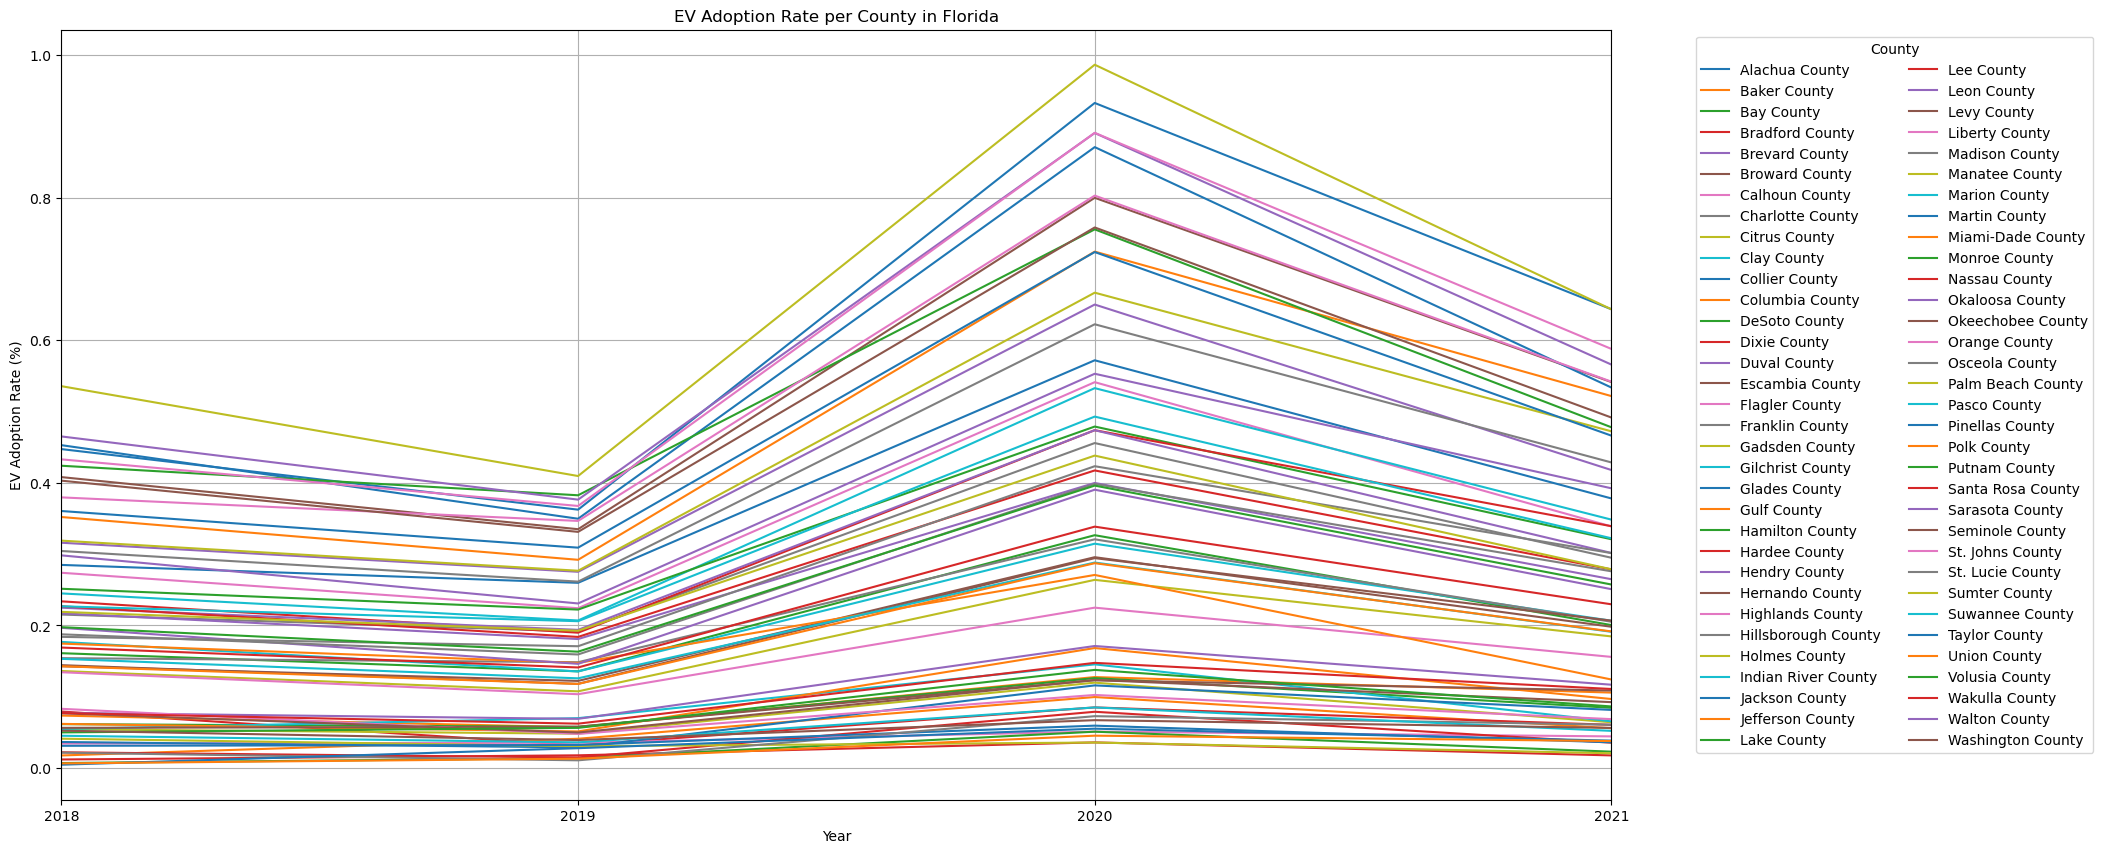

In [31]:
# Visualize the EV adoption rate per county in Florida over the years
ax = fl_adopt_rate.plot(
    title="EV Adoption Rate per County in Florida",
    xlabel="Year",
    ylabel="EV Adoption Rate (%)",
    figsize=(20, 10),
    legend=True,
    grid=True,
)

# Customize the legend
ax.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Function to save the plot
def save_plot(plot, file_path):
    file_path = Path(file_path)
    if file_path.exists():
        print(f"Overwriting existing file: `{file_path.name}`")
    else:
        print(f"Creating new file: `{file_path.name}`")
    
    plot.get_figure().savefig(file_path, bbox_inches="tight")
    print(f"Plot saved to `{file_path}`")

# Save the plot
file_name = "ev_adoption_rate_per_county_florida"
file_path = Path(f"../../../../reports/figures/{file_name}.png")
save_plot(ax, file_path)


# ======================== MESSY SECTION ========================